In [1]:
"""
SEMDS (ChemE 546) Homework 1 Notebook
Sebastian Peck, 1/10/2024

This notebook is designed to import and perform a
simple data exploration into the Harvard Clean
Energy Project Database.
"""

'\nSEMDS (ChemE 546) Homework 1 Notebook\nSebastian Peck, 1/10/2024\n\nThis notebook is designed to import and perform a\nsimple data exploration into the Harvard Clean\nEnergy Project Database.\n'

In [4]:
# Import Statements:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# get the path to the data
data_path = "HCEPDB_moldata.csv"

# Read the data at the path into a pandas dataframe
raw_data = pd.read_csv(data_path)

In [17]:
# display the head to get an idea of what we're working with
raw_data.head()

2322849

In [12]:
# For ease of viewing, here are the column names as a list.
column_names = raw_data.columns.tolist()
column_names

['id',
 'SMILES_str',
 'stoich_str',
 'mass',
 'pce',
 'voc',
 'jsc',
 'e_homo_alpha',
 'e_gap_alpha',
 'e_lumo_alpha',
 'tmp_smiles_str']

From this, we can see we have the index value of the compound,
a representative encoding via the SMILES method,
the classical Stoichiometry string,
the (assumedly) molar mass of the molecule [g/mol],
the Power Conversion Efficiency [%],
open circuit voltage [V] -- occurs when net current from device is zero --,
short circuit current [mA] -- maximum current from a solar cell, when voltage across is zero --,
the Highest occupied molecular orbital energy [maybe eV?],
the energy gap between highest and lowest unoccupied molecular orbital [eV?],
the lowest unoccupied molecular orbital [eV?],
and a temporary smiles string for unknown purposes.

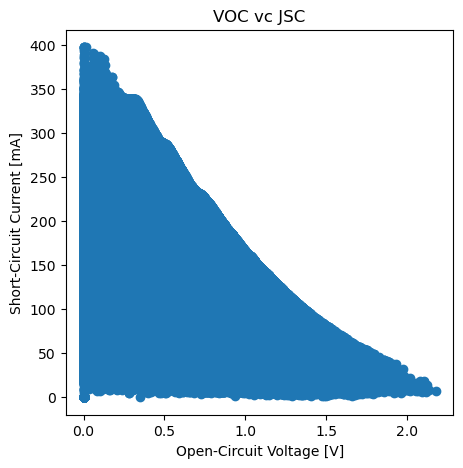

In [49]:
# Let's take a look at the VOC and JSC comparison: With a matplotlib figure.
fig, ax = plt.subplots(1, figsize = (5, 5))
ax.scatter(x=raw_data['voc'], y=raw_data['jsc'])
ax.set_xlabel('Open-Circuit Voltage [V]')
ax.set_ylabel('Short-Circuit Current [mA]')
ax.set_title('VOC vc JSC')
plt.show()

As we can see from above, there seems to be way
too many data points to reasonably interpret this data in this form.
With that said, there is somewhat of an observable trend where
all the data lies under a line of sorts. Let's see if any other
trends can be identified by examining the other data.

Text(0, 0.5, 'Percent Conversion Efficiency [%]')

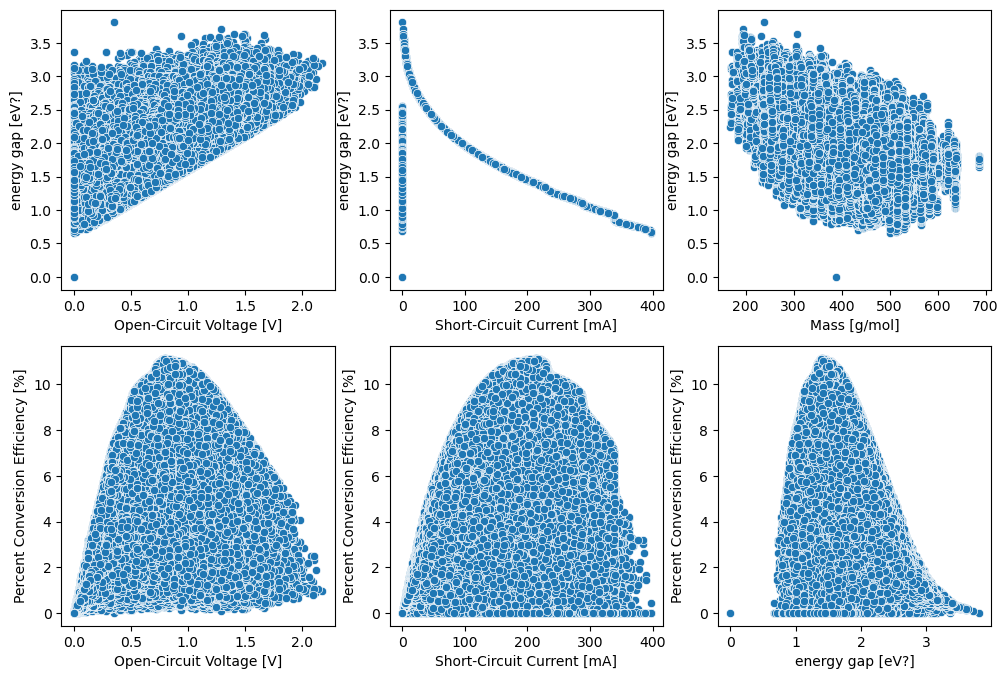

In [37]:
# Set up a set of subplots
fig, ax = plt.subplots(2, 3, figsize = (12, 8))
axs = ax.ravel()

# Plot 
sns.scatterplot(x=raw_data['voc'], y=raw_data['e_gap_alpha'], ax=ax[0, 0])
ax[0, 0].set_xlabel('Open-Circuit Voltage [V]')
ax[0, 0].set_ylabel('energy gap [eV?]')

sns.scatterplot(x=raw_data['jsc'], y=raw_data['e_gap_alpha'], ax=ax[0, 1])
ax[0, 1].set_xlabel('Short-Circuit Current [mA]')
ax[0, 1].set_ylabel('energy gap [eV?]')

sns.scatterplot(x=raw_data['mass'], y=raw_data['e_gap_alpha'], ax=ax[0, 2])
ax[0, 2].set_xlabel('Mass [g/mol]')
ax[0, 2].set_ylabel('energy gap [eV?]')

sns.scatterplot(x=raw_data['voc'], y=raw_data['pce'], ax=ax[1, 0])
ax[1, 0].set_xlabel('Open-Circuit Voltage [V]')
ax[1, 0].set_ylabel('Percent Conversion Efficiency [%]')

sns.scatterplot(x=raw_data['jsc'], y=raw_data['pce'], ax=ax[1, 1])
ax[1, 1].set_xlabel('Short-Circuit Current [mA]')
ax[1, 1].set_ylabel('Percent Conversion Efficiency [%]')

sns.scatterplot(x=raw_data['e_gap_alpha'], y=raw_data['pce'], ax=ax[1, 2])
ax[1, 2].set_xlabel('energy gap [eV?]')
ax[1, 2].set_ylabel('Percent Conversion Efficiency [%]')

Without some clear way of discretizing the data,
It is rather hard to interpret these charts - but
there are clear trends that emerge. We can see that
Short-circuit current is almost perfectly inversely proportional to energy gap,
though it is hard to tell just how many materials fall in the outliers with
zero short-circuit current. 

From this, it can be safely assumed that the materials in the data can be
lumped into two categories via short circuit current.

In a similar vein, when using percent conversion efficiency as a target metric,
we can see that there are specific open circuit voltages and short circuit currents,
as well as energy gaps, that seem to be ideal to maximize the conversion efficiency.

In [36]:
# So now, let us do some data processing!
# First, we split the data into two chunks, based on short-circuit current:
with_current = raw_data[raw_data['jsc'] != 0]
without_current = raw_data[raw_data['jsc'] == 0]

print("# of points with: {}, # of points without: {}".format(len(with_current), len(without_current)))

# of points with: 2262341, # of points without: 60508


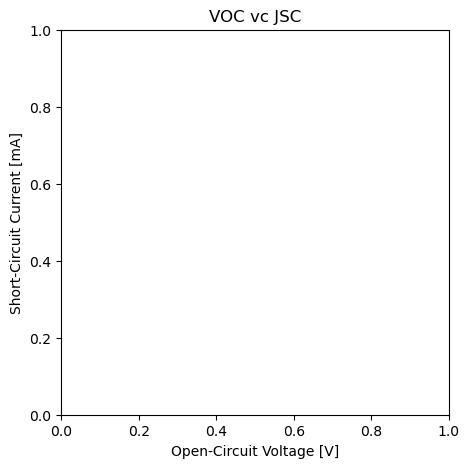

In [43]:
# Now, let's continue to filter that to try and maximize conversion efficiency:
# filtering it between 175 and 225.
current_maxim = with_current[with_current['jsc'].between(175, 225)]

# let's do the same for open circuit voltage and energy gap:
v_c_max = current_maxim[current_maxim['voc'].between(.75, 1.25)]
v_c_e_max = v_c_max[v_c_max['e_gap_alpha'].between(1.75, 2.25)]

#Now, let us plot that first plot again:
fig, ax = plt.subplots(1, figsize = (5, 5))
sns.scatterplot(x=v_c_e_max['voc'], y=v_c_e_max['jsc'], ax=ax)
ax.set_xlabel('Open-Circuit Voltage [V]')
ax.set_ylabel('Short-Circuit Current [mA]')
ax.set_title('VOC vc JSC')
plt.show()

In [41]:
# Huh. Well, that's not good.
print(len(current_maxim))
print(len(v_c_max))
print(len(v_c_e_max))

287581
27344
0


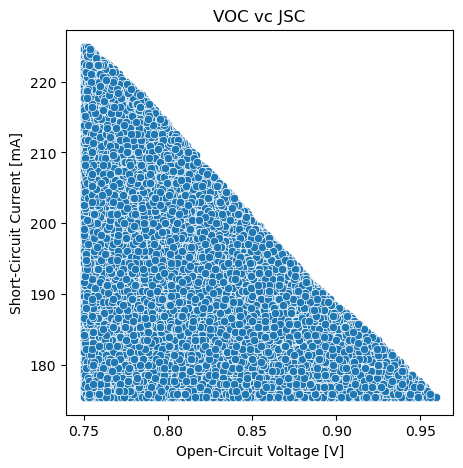

In [44]:
# It seems that in filtering the energy gap, we have inadvertently removed the remainder of our data.
# Let's dial it back a bit and plot without filtering the energy gap
fig, ax = plt.subplots(1, figsize = (5, 5))
sns.scatterplot(x=v_c_max['voc'], y=v_c_max['jsc'], ax=ax)
ax.set_xlabel('Open-Circuit Voltage [V]')
ax.set_ylabel('Short-Circuit Current [mA]')
ax.set_title('VOC vc JSC')
plt.show()

Text(0, 0.5, 'Percent Conversion Efficiency [%]')

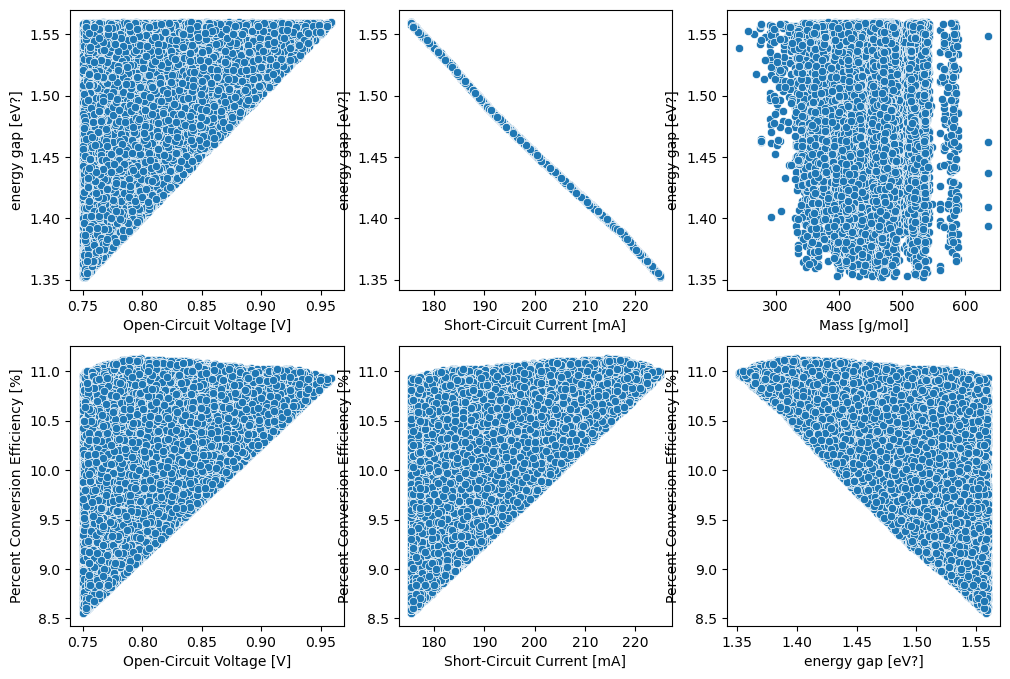

In [46]:
# While it looks almost identical, we have filtered out over 2 million points of data.
# Let's see if that has affected our other plots at all:
# Set up a set of subplots
fig, ax = plt.subplots(2, 3, figsize = (12, 8))
axs = ax.ravel()

# Plot 
sns.scatterplot(x=v_c_max['voc'], y=v_c_max['e_gap_alpha'], ax=ax[0, 0])
ax[0, 0].set_xlabel('Open-Circuit Voltage [V]')
ax[0, 0].set_ylabel('energy gap [eV?]')

sns.scatterplot(x=v_c_max['jsc'], y=v_c_max['e_gap_alpha'], ax=ax[0, 1])
ax[0, 1].set_xlabel('Short-Circuit Current [mA]')
ax[0, 1].set_ylabel('energy gap [eV?]')

sns.scatterplot(x=v_c_max['mass'], y=v_c_max['e_gap_alpha'], ax=ax[0, 2])
ax[0, 2].set_xlabel('Mass [g/mol]')
ax[0, 2].set_ylabel('energy gap [eV?]')

sns.scatterplot(x=v_c_max['voc'], y=v_c_max['pce'], ax=ax[1, 0])
ax[1, 0].set_xlabel('Open-Circuit Voltage [V]')
ax[1, 0].set_ylabel('Percent Conversion Efficiency [%]')

sns.scatterplot(x=v_c_max['jsc'], y=v_c_max['pce'], ax=ax[1, 1])
ax[1, 1].set_xlabel('Short-Circuit Current [mA]')
ax[1, 1].set_ylabel('Percent Conversion Efficiency [%]')

sns.scatterplot(x=v_c_max['e_gap_alpha'], y=v_c_max['pce'], ax=ax[1, 2])
ax[1, 2].set_xlabel('energy gap [eV?]')
ax[1, 2].set_ylabel('Percent Conversion Efficiency [%]')

In [53]:
#Awesome. Seem's like there've been some substantive changes.
# but does this eliminate useful data? 
# What if we find the compound with the highest percent conversion efficiency
#from the overall?
idxmax = raw_data['pce'].idxmax()
print(raw_data.loc[[idxmax]])

              id                                         SMILES_str  \
1733207  1358460  [SiH2]1C=c2c3ccc4cscc4c3c3ncc(cc3c2=C1)-c1nccc...   

           stoich_str      mass        pce       voc         jsc  \
1733207  C22H12N4S2Si  424.5828  11.130131  0.799256  214.319679   

         e_homo_alpha  e_gap_alpha  e_lumo_alpha  \
1733207     -5.399256     1.399318     -3.999938   

                                            tmp_smiles_str  
1733207  c1cnc(-c2cnc3c(c2)c2=C[SiH2]C=c2c2ccc4cscc4c32...  


While I cannot draw any conclusons from this about composition of materials,
it seems to be the case that maximizing pce would involve finding materials with
short circuit currents between 175 and 225 ma, Open circuit voltages between .75
and .95 V, and an energy gap between 1.25 eV and 1.75 ev.
